# Introducción Caso Kaggle

En nuestro caso Kaggle haremos un análisis completo de una base de datos que se nos ha asignado. Este análisis consistirá en los siguientes puntos:
1. Explorar y entender los datos de nuestro dataset.
2. Analizar los datos y encontrar relaciones entre ellos.
3. Crear y entrenar una serie de modelos clasificadores y compararlos entre si.
4. Analizar los resultados obtenidos.


## Base de datos
La base de datos que se nos ha asignado del Kaggle es **League of Legends Diamond Games (First 15 Minutes)**,  que básicamente contiene los datos de partidas jugadas en la categoría Diamante del juego League of Legends (también conocido por sus siglas LOL). 

El juego consiste en una batalla entre 2 equipos en los que cada equipo tiene como principal objetivo destruir el nexo del equipo rival. Cada equipo esta formado por 5 personajes fantásticos que pueden progresar a lo largo de la partida comprando una serie de ítems que hace al jugador superior a los rivales.

Esto será importante de cara al análisis de los datos ya que el oro conseguido será determinante para ganar la partida. Este oro se puede conseguir de varias formas, matando enemigos o matando una serie de dragones y esbirros(súbditos del equipo rival que buscan derrocar tus torres) que aparecen en el mapa.
Mas adelante en la parte de análisis de los datos explicaremos en profundidad el significado de los atributos a estudiar.

## Librerías 
En la siguiente celda importado las librerías que hemos necesitado para realizar este caso Kaggle. 

Las librerías más importantes las explicamos a continuación:
1. Pandas :  nos permite leer y escribir datos en diferentes formatos, en esta caso lo hemos usado para abrir la base de datos y visualizarla
2. Seaborn y Matplotlib : usadas para generar gráficos 
3. Sklearn :  es una librería de aprendizaje automático de software para Python.De ella hemos utilizado los algoritmos de clasificación y regresión usados.


In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification

## Exploración de los datos
Primero de todo visualizamos la base de datos y observamos que tipo de atributos tiene para entender mejor el problema.
Para ello visualizaremos la base de datos y explicaremos que explica cada dato y del tipo que es.
Si encontramos algún atributo que no nos sirva lo eliminaremos y identificaremos el atributo objetivo para luego poder hacer las predicciones.

In [293]:
dataset = pd.read_csv("dataset.csv", sep = ";")
print("Atributos de nuestro dataset:")
print(" ")
print(dataset.columns)
print(" ")
print("Tipología de los atributos de nuestro dataset:")
print(" ")
print(dataset.dtypes)
print(" ")
print("Cinco primeras entradas de la base de datos:")
print(" ")
dataset.head(5)



Atributos de nuestro dataset:
 
Index(['Unnamed: 0', 'matchId', 'blue_win', 'blueGold', 'blueMinionsKilled',
       'blueJungleMinionsKilled', 'blueAvgLevel', 'redGold',
       'redMinionsKilled', 'redJungleMinionsKilled', 'redAvgLevel',
       'blueChampKills', 'blueHeraldKills', 'blueDragonKills',
       'blueTowersDestroyed', 'redChampKills', 'redHeraldKills',
       'redDragonKills', 'redTowersDestroyed'],
      dtype='object')
 
Tipología de los atributos de nuestro dataset:
 
Unnamed: 0                   int64
matchId                    float64
blue_win                     int64
blueGold                   float64
blueMinionsKilled          float64
blueJungleMinionsKilled    float64
blueAvgLevel               float64
redGold                    float64
redMinionsKilled           float64
redJungleMinionsKilled     float64
redAvgLevel                float64
blueChampKills             float64
blueHeraldKills            float64
blueDragonKills            float64
blueTowersDestroyed    

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0


Como podemos ver prácticamente toda la base de datos es del tipo float64, es decir, son números decimales.
A continuación explicaremos mejor el significado de los datos:
El color blue* o red* indica básicamente el color del equipo al que hace referencia los datos.

**matchId:** Número único que identifica cada partida como única.

**gold:** Indica la cantidad de oro ganada por el equipo.

**MinionsKilled:** Indica la cantidad de miniones enemigos matados.(miniones son seres que ayudan a equipo contrario y aportan oro al matarlos).

**JungleMinionsKilled:** Indica la cantidad de animales fantásticos que has matado (éstos no son de ningún equipo y aportan más oro que los normales).

**AvgLevel:** Atributo que indica el nivel medio del equipo (incrementa al matar enemigos/miniones o tirar torres).

**ChampKills:** Enemigos matados a los primeros 15 minutos.

**HeraldKills:** Cantidad de Heraldo matados (Criatura que puede ser invocada para ayudar al equipo si la has matado antes).

**DragonKills:** Cantidad de dragones matados (aporta oro y experiencia y algunos atributos extra como velocidad).

**TowersDestroyed:** Torres enemigas destruidas.

El último atributo que queda es el atributo objetivo que será el que trataremos de predicho/clasificar que es el *blue_win*.

**blue_win:** Número entero que se pone a 1 si el equipo azul gana ya 0 si pierde.


# ANÁLISIS EN PROFUNDIDAD DE LOS DATOS 
A continuación vamos a proceder a analizar la relación que tenemos entre los datos viendo la correlación entre ellos y vamos a estudiar mas en profundidad nuestro atributo objetivo.
Por último prepararemos los datos para poder realizar los modelos separando así la parte de test y train.

Empezamos mostrando unos gráficos de todos los atributos para visualizar que distribución siguen (si siguen distribución normal por ejemplo para saber como manipularlos en un futuro) y para entender mejor como se comportan individualmente.

C:\Users\rubeg\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rubeg\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


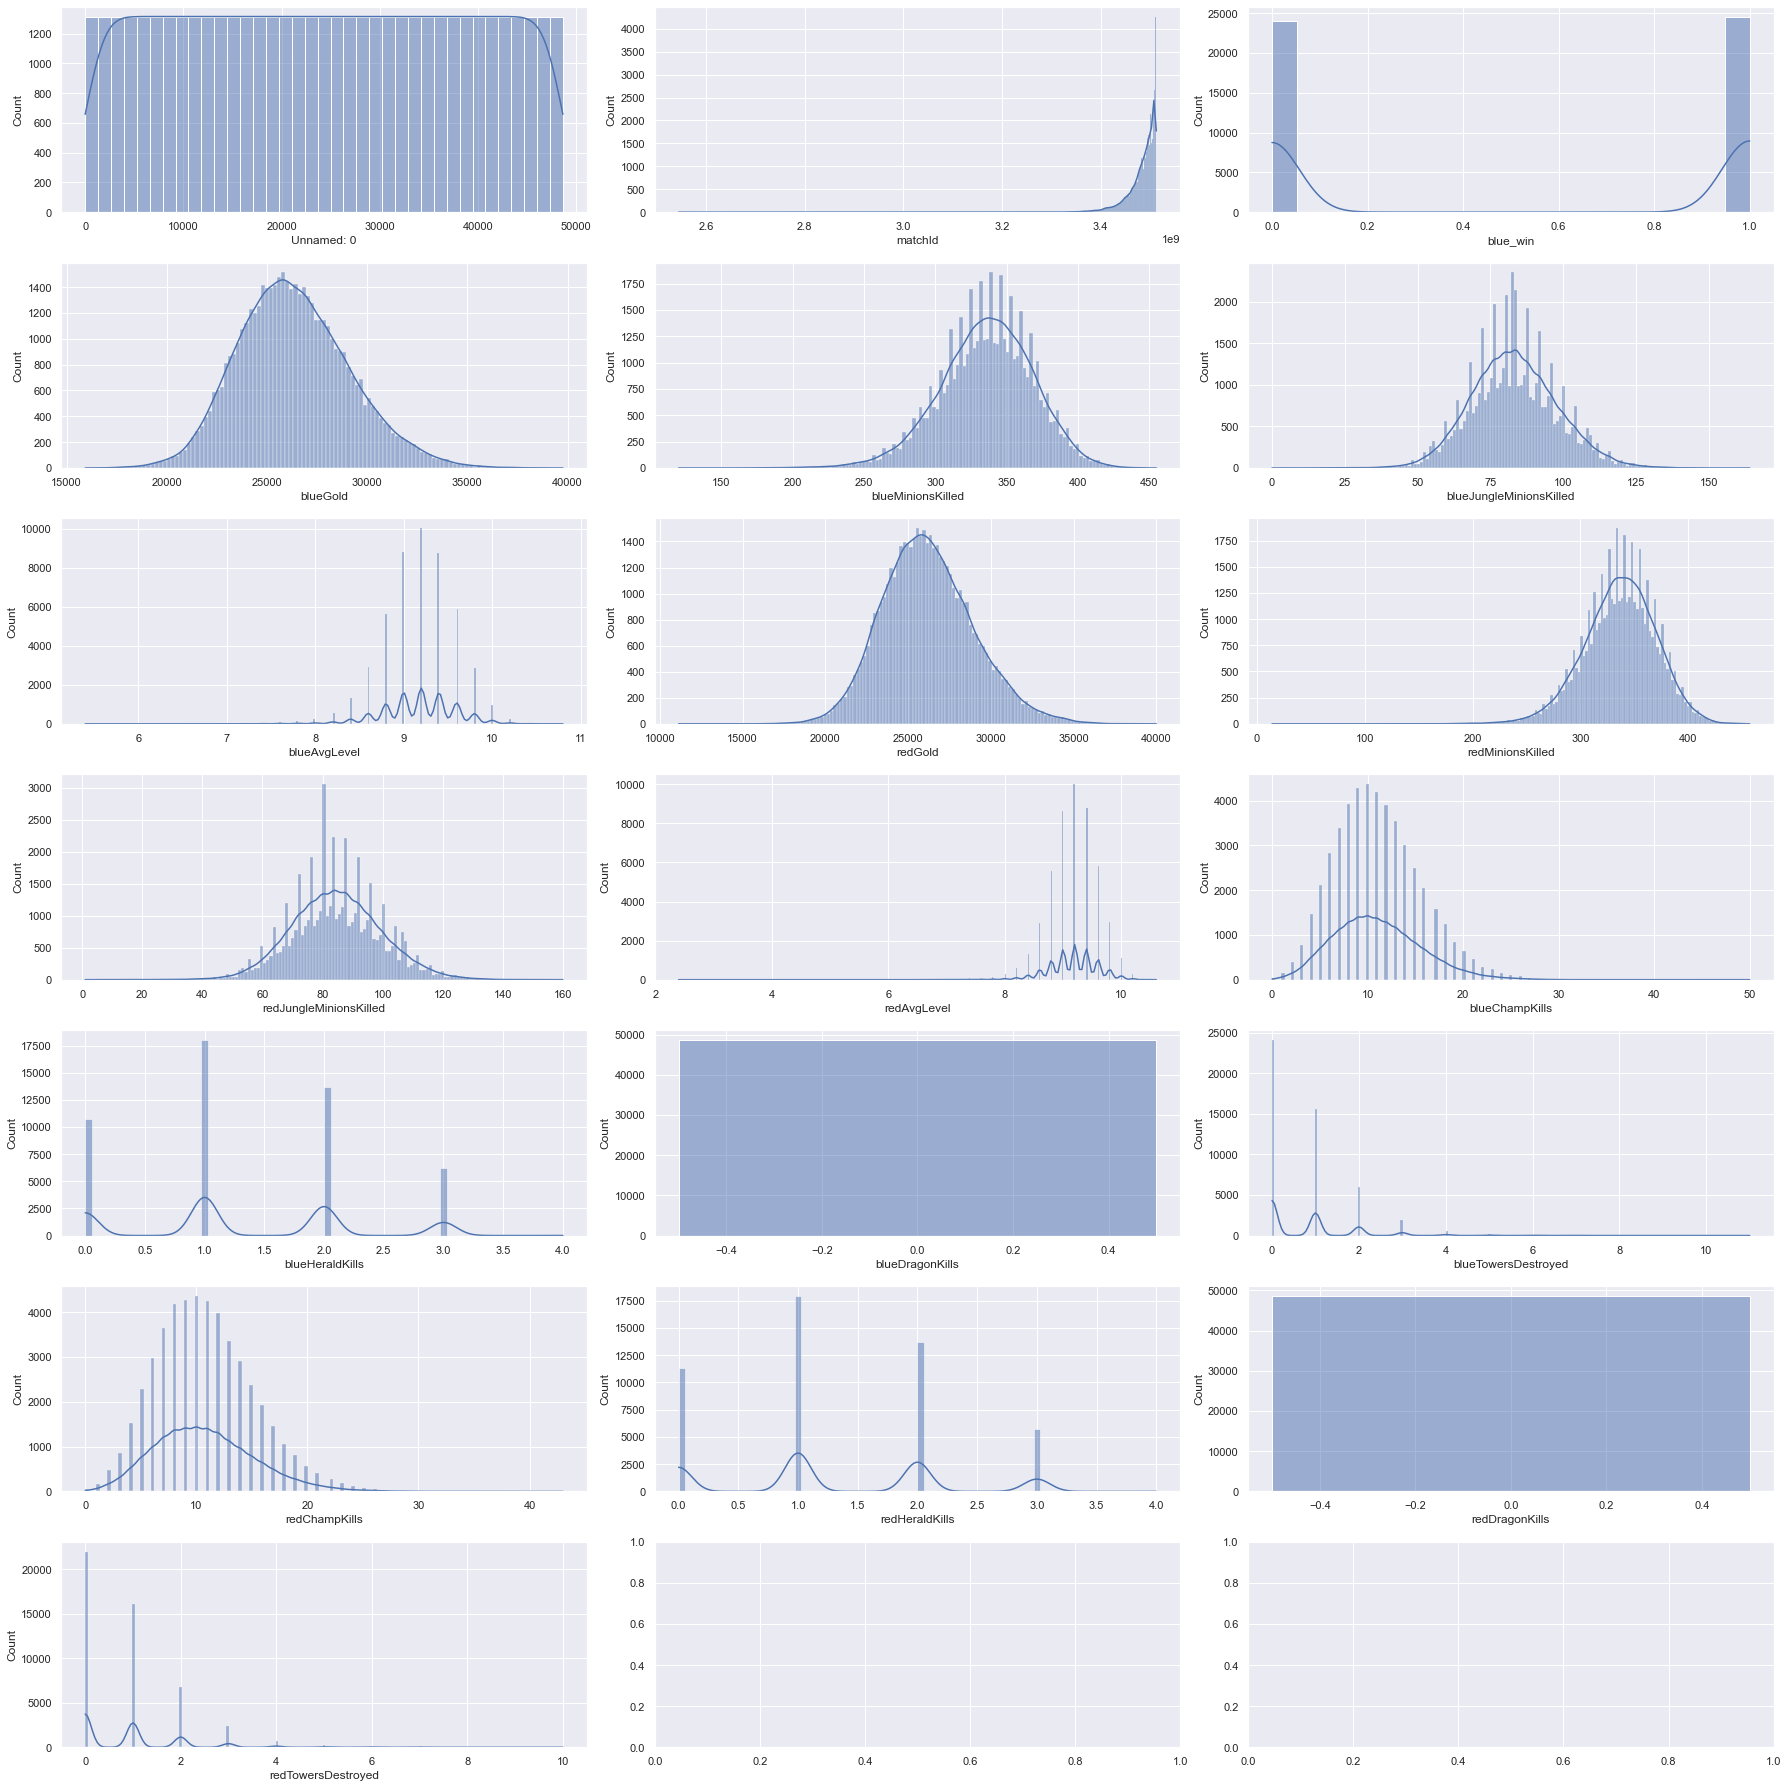

In [294]:
def crea_histogramas(dataframe):
    f, axs = plt.subplots(int(np.ceil(len(dataframe.columns)/3)), 3, figsize=(25, 25))
    for i, c in enumerate(dataframe.columns):
        plt.subplot(int(np.ceil(dataframe.shape[1]/3)), 3, i+1)
        sns.histplot(dataframe[c], kde=True)

crea_histogramas(dataset)
plt.show()

Como podemos observar existen una serie de atributos interesantes, algunos siguen una distribución normal muy clara que se puede deducir sólo con la gráfica visualmente. Éste sería el caso de el oro conseguido, los minions eliminados o rivales eliminados, podemos observar que para estos datos llega un punto máximo después de un crecimiento y justo después viene un decrecimiento proporcional al augmento previo, esto se considera una distribución normal o de Gauss ya que acaba formando una campana de Gauss.

He pensado también que hay un par de atributos que eliminaremos antes de hacer el modelo ya que no nos son de gran ayuda a la hora de clasificar ya que no nos aportan una información útil y solo ralentizarían el proceso. Estos atributos son el matchId y la primera columna Unnamed: 0 ya que estos dos atributos no afectan en nada a si un equipo ganará la partida o no.

Por último observamos unos atributos un tanto extraños como el redDragonKills y el blueDragonsKill en los cuales no sale una gráfica muy lógica así que en el siguiente apartado nos disponemos a saber el porque.

In [295]:
freq = dataset['redDragonKills'].value_counts()  
print(freq)
freq = dataset['blueDragonKills'].value_counts()  
print(freq)
print(" ")
print('Filas del dataset:', dataset.shape[0])
print('Número de atributos:', dataset.shape[1])

0.0    48651
Name: redDragonKills, dtype: int64
0.0    48651
Name: blueDragonKills, dtype: int64
 
Filas del dataset: 48651
Número de atributos: 19


Como observamos, tanto el atributo redDragonKills como el blueDragonKills tienen todas las casillas a 0. No sé si se debe a un error en la base de datos o simplemente la base de datos no es real sino una simulación pero nosotros a la hora de clasificar eliminaremos también estos 2 atributos ya que nos aportan una información nula.

Aprovechando que hemos mirado la frecuencia de estos atributos hemos observado también el tamaño de nuestro dataset que es de 48651 filas y tiene un total de 19 atributos (columnas).

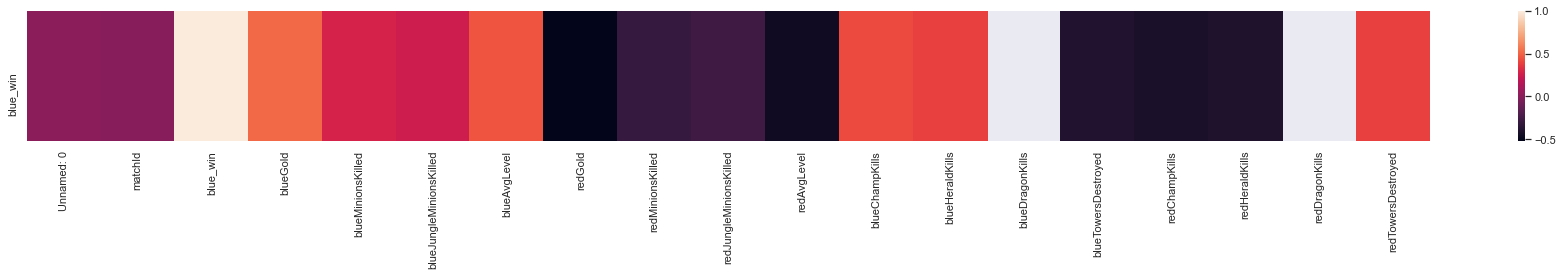

In [296]:
plt.subplots(figsize=(25, 4))
sns.heatmap(dataset.corr()["blue_win"].to_frame().T)
plt.show()

En la matriz de confusión anterior (lo hemos filtrado directamente según el atributo que interesa por no tener la matriz entera) podemos observar que los atributos más interesantes para clasificar (los que más correlación tienen con el atributo objetivo) serían lo que son de un beige o un color rojo más claro.
En este caso obviamos blue_win porque es el mismo atributo y también los DragonKills por lo que hemos explicado anteriormente y los atributos más interesantes serían:
- blueGold
- blueAvgLevel
- blueChampsKills

Los resultados sabiendo de que trata el juego eran esperables puesto que son los atributos que más afectan al juego ya que hacen que tu equipo tenga más probabilidades de ganar, por tanto la matriz de confusión nos da unos resultados lógicos y entendibles.


A continuación vamos a analizar algo más específicamente sobre nuestro atributo objetivo.

1    24589
0    24062
Name: blue_win, dtype: int64
0.505416127109412


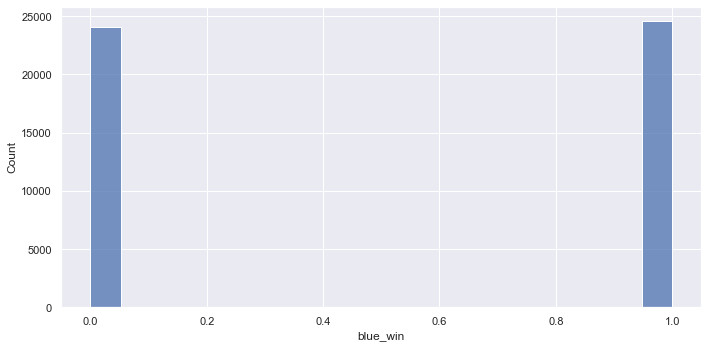

In [297]:
sns.histplot(dataset["blue_win"])

freq = dataset['blue_win'].value_counts()  
print(freq)

print(dataset['blue_win'].mean())


En este caso como bien se ha dicho en el apartado de exploración de los datos blue_win es un atributo entero que podríamos entender como binario ya que sólo puede abarcar dos números, 1 o 0.

Blue_win será 1 si el equipo azul gana y será 0 si el equipo azul pierde y gana el rojo.

Lo primero que observamos en el histplot es que aproximadamente cada equipo gana las mismas veces, aunque el equipo azul parece ganar unas pocas más.

Para comprobarlo, miramos la frecuencia de los datos y efectivamente el equipo azul gana 500 partidas más aproximadamente que sobre las 50.000 que se juegan es mínimo.

Para asegurar esto calculamos la media de los datos y obtenemos un 0.505, un número que queda muy cerca del 0,500 que sería equitativo, por tanto podemos decir que prácticamente ganan las mismas partidas que pierden.

A continuación vamos a dividir los datos en el conjunto de train y el de test, eliminando antes el atributo que hemos explicado que no aportan mucho al modelo.

In [298]:
x = dataset.drop(columns = ["matchId","Unnamed: 0", "redDragonKills", "blueDragonKills", "blue_win"], axis=1)
y = dataset["blue_win"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# MODEL

Una vez hemos dividido la información en conjuntos de train y de test nos quedaría elegir el mejor modelo para clasificar.
En éste caso he decidido aplicar varios modelos para después decidir que modelo clasifica mejor mis datos. 
Entre los modelos que podía esocojer estaban el de regresión logística, svc, naive-bayes, k-means, knn o decision-tree.
He decidido escojer los dos últimos ya que son dos modelos que hemos visto en clase y creo que pueden servir para este caso ya que son muy visuales y podremos observar bien como clasifican los datos.

Empezaremos por el decision-tree:

In [299]:
k = 3
parametros = {
    'splitter':['best','random'],
    'max_depth':range(1,20),
    'criterion':['gini','entropy']   
}

mejores_parametros = GridSearchCV(DecisionTreeClassifier(), cv=3, param_grid=parametros)
mejores_parametros.fit(X_train, y_train)

print("Mejores parametros para nuestro árbol: ", mejores_parametros.best_params_)

Mejores parametros para nuestro árbol:  {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}


Observé en otros proyectos anteriores que existe la función  *GridSearchCV* con la que puedes encontrar los mejores parámetros para entrenar el decision_tree así que la apliqué y obtuve los resultados anteriores para el mejor criterio de classificación y splitter.

Entonces entrenaremos nuestro decision_tree con los datos que tenemos y los anteriores parametros.

In [300]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best')
model = model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
precision = round(precision_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred)*100,2)
score = round(f1_score(y_test,y_pred)*100,2)

print('Accuracy:', accuracy, '%')
print('Precision:', precision, '%')
print('Recall:', recall, '%')
print('Score:', score, '%')

Accuracy: 77.53 %
Precision: 75.99 %
Recall: 81.28 %
Score: 78.55 %


En el mejor de los casos obtenemos un accuracy del 77.47%, bastante buen resultado ya que es el porcentaje de aciertos que ha realizado nuestro modelo clasificador.
También hemos calculado la *precision* que nos sale bastante alta ya que el modelo clasifica correctamente los aciertos según los aciertos esperables.
El arreglo indica la relación entre las predicciones positivas correctas y el total de predicciones positivas y también ronda el 80%.

Por último, la métrica f1_score que evalúa lo bueno que es el modelo deja ver que nuestro modelo a pesar de no ser perfecto, clasifica bastante bien nuestros datos y es muy cuidadoso.

A continuación podemos ver la curva de ROC que representa el cumplimiento de cualquier modelo clasificador y representa los positivos que clasifica correctamente sobre los que no.

En el mejor de los casos el área debajo de la curva será 1 y más que una curva veremos una línea recta en el eje x. Como podemos ver en la curva ROC y ya hemos visto en las métricas, nuestro modelo no clasifica perfectamente pero acierta muchas más veces de las que falla.

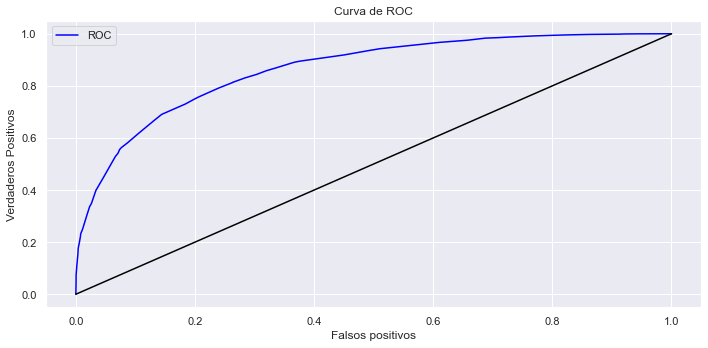

0.8633923799601428

In [301]:
def plot_roc_curve(y, x):
    plt.plot(y, x, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='-')
    plt.xlabel('Falsos positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.title('Curva de ROC')
    plt.legend()
    plt.show()
    

model = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='best')
model = model.fit(X_train, y_train)
prob = model.predict_proba(X_test)
prob = prob[:, 1]
x, y, z = roc_curve(y_test, prob)
plot_roc_curve(x, y)

metrics.auc(x,y)

A continuació representem l'arbre amb un profunditat  = 2 ja que com tenim molts atributs sino l'arbre es veu massa petit.

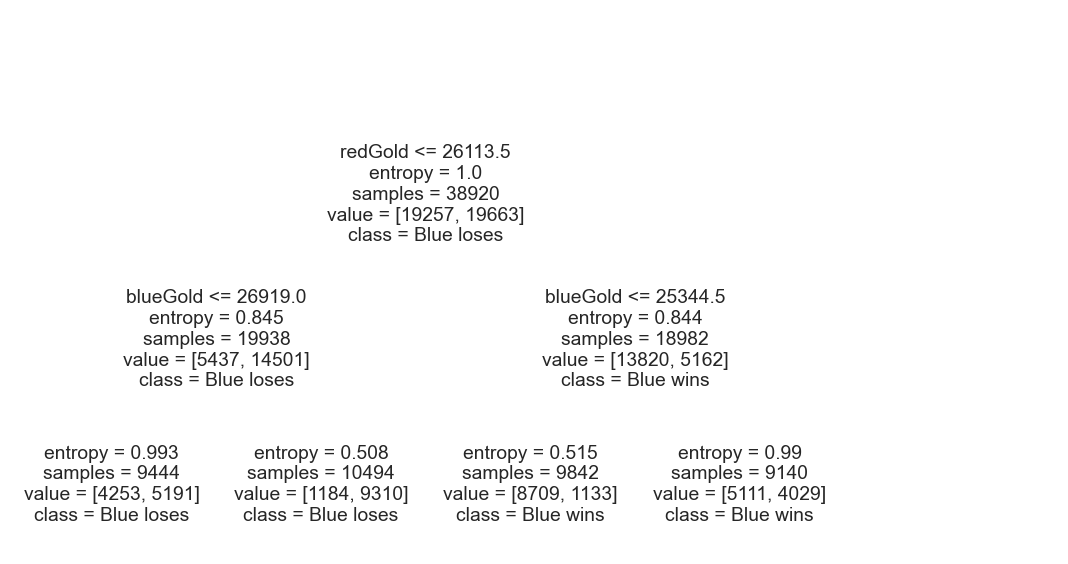

In [302]:
model_simple = DecisionTreeClassifier(criterion="entropy", max_depth=2, splitter="best")
model_simple = model_simple.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
tree.plot_tree(model_simple, feature_names=X_train.columns, class_names=['Blue wins', 'Blue loses'])
plt.show()

A continuació farem el mateix que hem fet anteriorment però amb el model knn.


In [303]:
parameters = dict()
parametros = {
    'n_neighbors' : [3,5,7,10],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
    }


mejores_parametros = GridSearchCV(KNeighborsClassifier(), parametros, verbose = 1, cv=3,n_jobs=-1)
mejores_parametros.fit(X_train, y_train)

print("Mejores parametros para knn: ", mejores_parametros.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   12.8s finished


Mejores parametros para knn:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}


In [304]:
model = KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='manhattan')
model = model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
precision = round(precision_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred)*100,2)
score = round(f1_score(y_test,y_pred)*100,2)

print('Accuracy:', accuracy, '%')
print('Precision:', precision, '%')
print('Recall:', recall, '%')
print('Score:', score, '%')



Accuracy: 76.03 %
Precision: 78.58 %
Recall: 72.37 %
Score: 75.35 %


Como observamos las métricas no nos dan muy distintas al modelo de DecisionTree pese a que este modelo clasifica un poco peor.
L'accuracy baja un 1.3%, muy poco respecto al DecisionTree, por tanto el modelo knn también clasifica bastante bien los datos de este dataset en concreto.

El Score, que es lo que definiría la validez y correcto que es el modelo es de un 75.43% mientras que en el DecisionTree era de un 78%.

Como hemos dicho, la diferencia entre los dos es baja, pero existe, y por tanto al momento de seleccionar uno de los dos seleccionaríamos el modelo de árbol de decisión.

Por último vamos a ver la curva de ROC como hemos hecho anteriormente con el DecisionTree y podemos observar que la curva es muy pareja ya que son modelos que clasifican los datos con un acierto muy parecido.

Pese a eso al calcular el area de debajo de la curva obtenemos que el valor es algo menor y por tanto el modelo es peor.

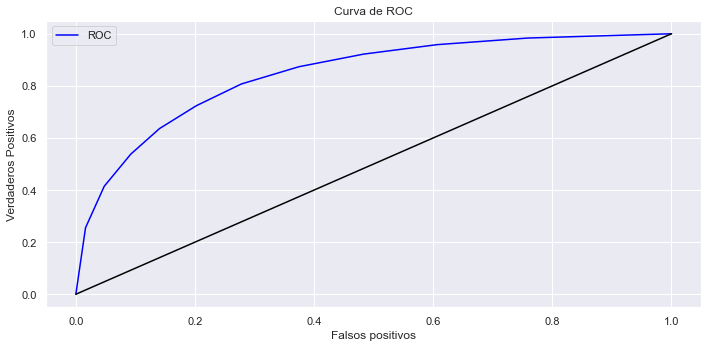

0.8437471455797626

In [305]:
model = KNeighborsClassifier(n_neighbors=10, weights='uniform', metric='manhattan')
model = model.fit(X_train, y_train)
prob = model.predict_proba(X_test)
prob = prob[:, 1]
x, y, z = roc_curve(y_test, prob)
plot_roc_curve(x, y)

metrics.auc(x,y)

# CONCLUSIONES

Al hacer este caso kaggle he sacado las siguientes conclusiones:
- Para la base de datos que tenía, creo que ambos modelos aplicados clasifican con bastante acierto ya que las métricas así lo respaldan, pero pese a eso el mejor modelo de los estudiados para analizar esta base de datos en concreto es el decision_tree.

- He podido ver la importancia de los parámetros a la hora de entrenar un modelo buscando los prámetros óptimos y comparando con otros parámetros y he observado que puede afectar mucho al comportamiento de nuestro modelo (por ejemplo el tipo de distancia entre nodos, los k vecinos en el caso del knn...).

- A la hora de explorar y analizar datos me he dado cuenta de que previamente a hacer el modelo es útil entender a fondo los datos ya que pueden haber datos que no aportan ninguna información útil de cara a la clasificación y lo único que harían es ralentizar el proceso, en caso de usar una base de datos muy grande esto podría aumentar bastante la ineficiencia del modelo.